In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model    # create a model
from keras.applications.vgg16 import VGG16 # we use vgg16 pre-trained model
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator # impoert image that's by we use imagedata generator
# we use ImageDataGenerator because our image is very less because there is 275 classes and  near to 3.8k image
# imagedatagenerator basically do, if i have one image then it create multiple image from different different angle .
# it will increase the brightness and decrease the brightness, zoom in and zoom out. so create a lot's of image
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
IMAGE_SIZE=[224,224]

In [ ]:
train_directory='/content/drive/MyDrive/bird_classification/train'
test_directory='/content/drive/MyDrive/bird_classification/test'
val_directory='/content/drive/MyDrive/bird_classification/validation'

In [ ]:
IMAGE_SIZE+[3]


[224, 224, 3]

In [ ]:
# add preprocessing layer to the front of vgg
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

# don't train existing weight
for layer in vgg.layers:
    layer.trainable=False

# it will download the vgg16_weight file of that.h5 file from google Api

In [ ]:
#useful for getting number of classes
folders=glob('/content/drive/MyDrive/bird_classification/train/*')
len(folders)

10

In [ ]:
folders

['/content/drive/MyDrive/bird_classification/train/BALTIMORE ORIOLE',
 '/content/drive/MyDrive/bird_classification/train/BARN OWL',
 '/content/drive/MyDrive/bird_classification/train/BALI STARLING',
 '/content/drive/MyDrive/bird_classification/train/BANDED STILT',
 '/content/drive/MyDrive/bird_classification/train/BAND TAILED GUAN',
 '/content/drive/MyDrive/bird_classification/train/BARN SWALLOW',
 '/content/drive/MyDrive/bird_classification/train/BANANAQUIT',
 '/content/drive/MyDrive/bird_classification/train/BARRED PUFFBIRD',
 '/content/drive/MyDrive/bird_classification/train/BANDED BROADBILL',
 '/content/drive/MyDrive/bird_classification/train/BANDED PITA']

In [ ]:
# our layer - add if you want
x=Flatten()(vgg.output)
# x= Dense(1000, activation='relu')(x)
prediction=Dense(len(folders),activation='softmax')(x)

In [ ]:
# create a model object
model=Model(inputs=vgg.input, outputs=prediction)

#view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
# using  imagedatagenerator we increase the rescale, zoom_range,horizontal flip of image, of train and test data


test_datagen=ImageDataGenerator(rescale=1./255)
# here take the image from training directory
# for image size early define is 224 and batch size is 32
training_set=train_datagen.flow_from_directory(train_directory,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')
#here take the image data from test directory
test_set=test_datagen.flow_from_directory(test_directory,
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='categorical')
# it basically define number of imagese define belonging to classes

Found 1536 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [ ]:
print(len(training_set))
print(len(test_set))

48
2


In [ ]:
num_training_samples = 10
num_validation_samples = 10
r=model.fit_generator(
training_set,
validation_data=test_set,
epochs=5,
steps_per_epoch=num_training_samples,
validation_steps=num_validation_samples
)

<ipython-input-40-e5cc97394e71>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(


Epoch 1/5
10/10 [==============================] - ETA: 0s - loss: 2.8495 - accuracy: 0.3250

10/10 [==============================] - 115s 11s/step - loss: 2.8495 - accuracy: 0.3250 - val_loss: 1.5549 - val_accuracy: 0.5000
Epoch 2/5
10/10 [==============================] - 65s 6s/step - loss: 1.0119 - accuracy: 0.6750
Epoch 3/5
10/10 [==============================] - 49s 5s/step - loss: 0.7651 - accuracy: 0.7469
Epoch 4/5
10/10 [==============================] - 41s 4s/step - loss: 0.4676 - accuracy: 0.8438
Epoch 5/5
10/10 [==============================] - 31s 3s/step - loss: 0.4006 - accuracy: 0.8938


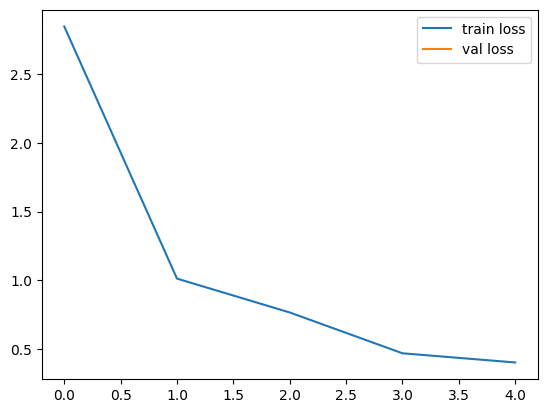

In [ ]:
# loss
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()

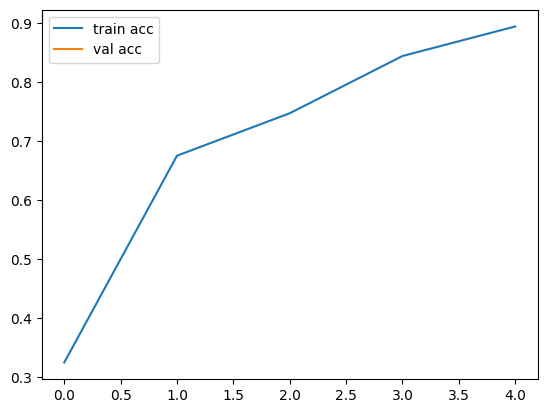

In [ ]:
#accuracies
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()

In [ ]:
model.save('BC.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array

model1=load_model('./BC.h5',compile=False)

In [ ]:
lab=training_set.class_indices
lab={k:v for v,k in lab.items()}

In [ ]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    print(img)
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class=answer.argmax(axis=-1)
    y=" ".join(str(x) for x in y_class)
    y=int(y)
    res=lab[y]
    return res


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FF0125542E0>
1/1 [==============================] - 1s 1s/step


'BALI STARLING'

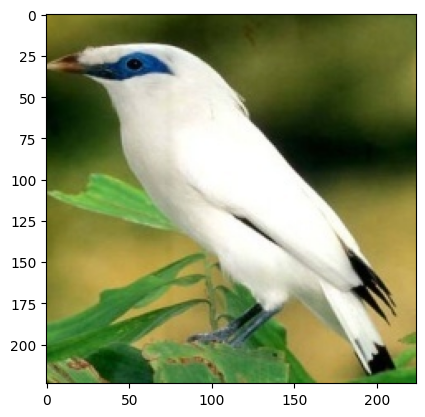

In [ ]:
img='/content/drive/MyDrive/bird_classification/validation/BALI STARLING/1.jpg'
pic=load_img(img)
plt.imshow(pic)
output(img)


In [ ]:
import tensorflow as tf
import keras as k
print(tf.__version__)
print(k.__version__)

2.15.0
2.15.0
